In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#Remove warnings
import warnings
warnings.filterwarnings('ignore')



In [10]:
#load dataset
df=pd.read_csv('Smart_Farming.csv')
pd.set_option('display.max_rows',None)
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,1/8/2024,5/9/2024,122,4408.07,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2/4/2024,5/26/2024,112,5389.98,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2/3/2024,6/26/2024,144,2931.16,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2/21/2024,7/4/2024,134,4227.80,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2/5/2024,5/20/2024,105,4979.96,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [8]:
df.tail()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
495,FARM0496,Central USA,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,...,1/16/2024,6/2/2024,138,4251.40,SENS0496,5/8/2024,30.386623,76.147700,0.59,Mild
496,FARM0497,North India,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,...,1/1/2024,4/14/2024,104,3708.54,SENS0497,1/19/2024,18.832748,75.736924,0.85,Severe
497,FARM0498,North India,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,...,1/2/2024,5/9/2024,128,2604.41,SENS0498,4/20/2024,23.262016,81.992230,0.71,Mild
498,FARM0499,Central USA,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,...,1/25/2024,6/4/2024,131,2586.36,SENS0499,3/2/2024,19.764989,84.426869,0.77,Severe
499,FARM0500,North India,Wheat,30.22,7.42,20.57,72.61,89.74,5.09,NaN,...,2/16/2024,6/29/2024,134,5891.40,SENS0500,5/11/2024,13.455532,88.880605,0.85,Severe


In [67]:
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.432000,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.429323,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.000000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.000000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.000000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5061.750000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.000000,34.981531,89.991901,0.900000


In [21]:
#check null value
for col in df.columns:
     missing=np.mean(df[col].isnull())
     print('{}.{}%'.format(col,missing))
    

farm_id.0.0%
region.0.0%
crop_type.0.0%
soil_moisture_%.0.0%
soil_pH.0.0%
temperature_C.0.0%
rainfall_mm.0.0%
humidity_%.0.0%
sunlight_hours.0.0%
irrigation_type.0.3%
fertilizer_type.0.0%
pesticide_usage_ml.0.0%
sowing_date.0.0%
harvest_date.0.0%
total_days.0.0%
yield_kg_per_hectare.0.0%
sensor_id.0.0%
timestamp.0.0%
latitude.0.0%
longitude.0.0%
NDVI_index.0.0%
crop_disease_status.0.26%


In [34]:
df.dtypes

farm_id                  object
region                   object
crop_type                object
soil_moisture_%         float64
soil_pH                 float64
temperature_C           float64
rainfall_mm             float64
humidity_%              float64
sunlight_hours          float64
irrigation_type          object
fertilizer_type          object
pesticide_usage_ml      float64
sowing_date              object
harvest_date             object
total_days                int64
yield_kg_per_hectare    float64
sensor_id                object
timestamp                object
latitude                float64
longitude               float64
NDVI_index              float64
crop_disease_status      object
dtype: object

In [11]:
#change data type
df['yield_kg_per_hectare']=df['yield_kg_per_hectare'].astype('int64')
df.head()


,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,1/8/2024,5/9/2024,122,4408,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2/4/2024,5/26/2024,112,5389,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2/3/2024,6/26/2024,144,2931,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2/21/2024,7/4/2024,134,4227,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2/5/2024,5/20/2024,105,4979,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe


In [12]:
df['timestamp_correct']=df['timestamp'].astype(str).str[4:]
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status,timestamp_correct
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,5/9/2024,122,4408,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild,/2024
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,5/26/2024,112,5389,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN,/2024
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,6/26/2024,144,2931,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild,/2024
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,7/4/2024,134,4227,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN,/2024
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,5/20/2024,105,4979,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe,/2024


In [8]:
df.sort_values(by=['yield_kg_per_hectare'], inplace=False,ascending=False)
df.head()


,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status,timestamp_correct
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,5/9/2024,122,4408,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild,/2024
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,5/26/2024,112,5389,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN,/2024
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,6/26/2024,144,2931,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild,/2024
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,7/4/2024,134,4227,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN,/2024
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,5/20/2024,105,4979,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe,/2024


In [23]:
#Drop duplicates
df['crop_type'].drop_duplicates().sort_values(ascending=False)

0      Wheat
1    Soybean
5       Rice
3      Maize
4     Cotton
Name: crop_type, dtype: object

In [24]:
df['region'].drop_duplicates().sort_values(ascending=False)

1       South USA
10    South India
0     North India
7     East Africa
3     Central USA
Name: region, dtype: object

In [25]:
#Data cleaning
df.duplicated().sum()


np.int64(0)

In [9]:
#Drop duplicates
df.drop_duplicates()
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status,timestamp_correct
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,5/9/2024,122,4408,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild,/2024
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,5/26/2024,112,5389,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN,/2024
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,6/26/2024,144,2931,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild,/2024
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,7/4/2024,134,4227,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN,/2024
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,5/20/2024,105,4979,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe,/2024


In [32]:
df.shape

(500, 23)

In [6]:
df.columns

Index(['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH',
       'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours',
       'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml',
       'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare',
       'sensor_id', 'timestamp', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status', 'timestamp_correct'],
      dtype='object')

In [7]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

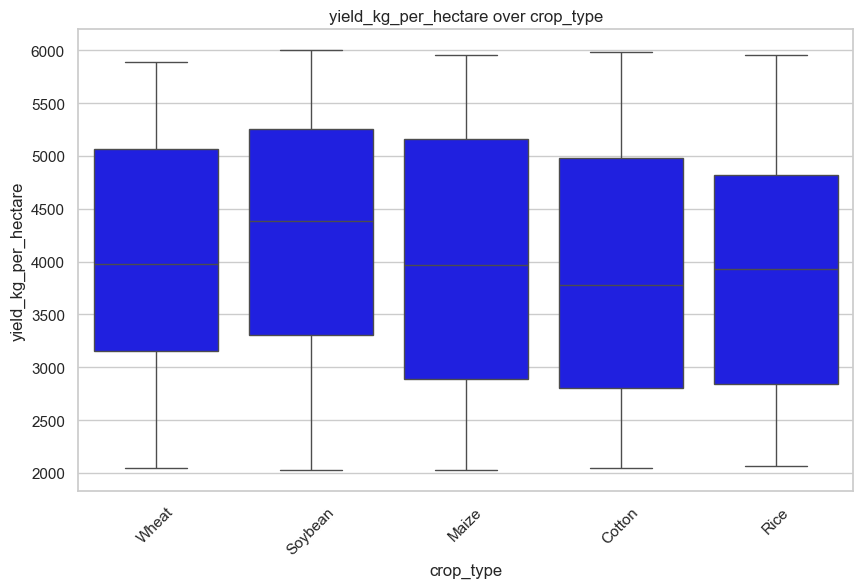

In [8]:
#show boxplot of yield_kg_per_hectare over crop_type'
sns.boxplot(data=df,x='crop_type',y='yield_kg_per_hectare',color="blue")
plt.xticks(rotation=45)
plt.title('yield_kg_per_hectare over crop_type')
plt.xlabel('crop_type')
plt.ylabel('yield_kg_per_hectare')
plt.show()

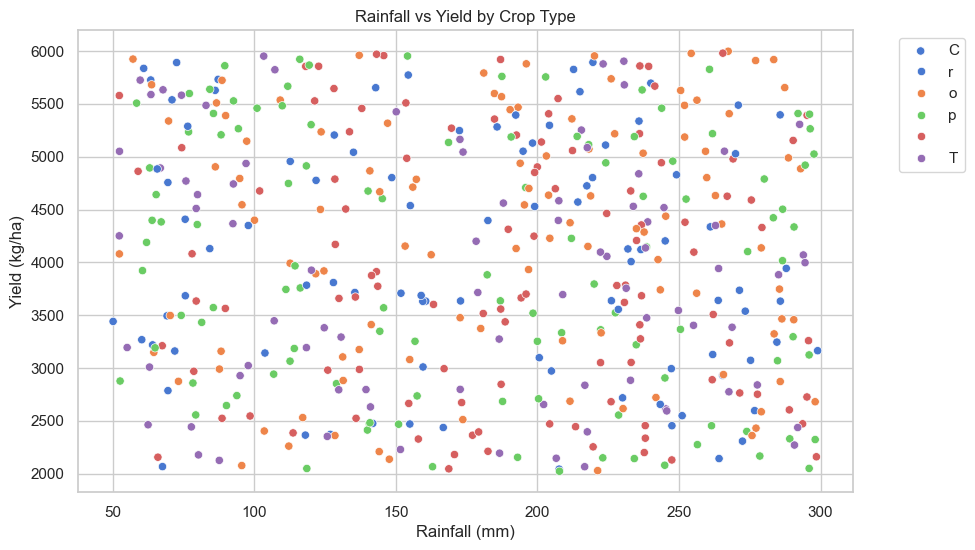

In [9]:
#show scatterplot of Rainfall vs Yield by Crop Type
sns.scatterplot(data=df,x='rainfall_mm',y='yield_kg_per_hectare',hue='crop_type')
plt.title("Rainfall vs Yield by Crop Type")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.legend("Crop Type",bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

In [10]:
#show correlation
df.corr(numeric_only=True, method='pearson')

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
soil_moisture_%,1.000000,0.001696,0.032365,0.048468,0.003722,0.058180,0.022374,0.006927,-0.063039,-0.013356,0.018570,-0.015675
soil_pH,0.001696,1.000000,0.031248,-0.059785,0.003853,-0.022967,-0.192798,0.018942,0.024262,-0.043649,-0.016157,0.092729
temperature_C,0.032365,0.031248,1.000000,0.026232,-0.028917,0.001237,0.019528,0.045627,0.027866,0.050449,0.039741,-0.032986
rainfall_mm,0.048468,-0.059785,0.026232,1.000000,-0.023946,0.005975,0.013479,-0.025672,-0.076824,0.068599,-0.004107,0.091088
humidity_%,0.003722,0.003853,-0.028917,-0.023946,1.000000,0.015724,0.029472,-0.017590,0.039030,-0.021625,0.013954,-0.027281
sunlight_hours,0.058180,-0.022967,0.001237,0.005975,0.015724,1.000000,0.002825,-0.006084,0.020306,-0.026100,-0.010468,0.004330
pesticide_usage_ml,0.022374,-0.192798,0.019528,0.013479,0.029472,0.002825,1.000000,0.040234,0.041296,-0.141935,0.047463,0.015329
total_days,0.006927,0.018942,0.045627,-0.025672,-0.017590,-0.006084,0.040234,1.000000,-0.007568,0.042761,-0.006205,-0.067138
yield_kg_per_hectare,-0.063039,0.024262,0.027866,-0.076824,0.039030,0.020306,0.041296,-0.007568,1.000000,-0.038124,0.022370,0.038076
latitude,-0.013356,-0.043649,0.050449,0.068599,-0.021625,-0.026100,-0.141935,0.042761,-0.038124,1.000000,-0.025941,-0.036218


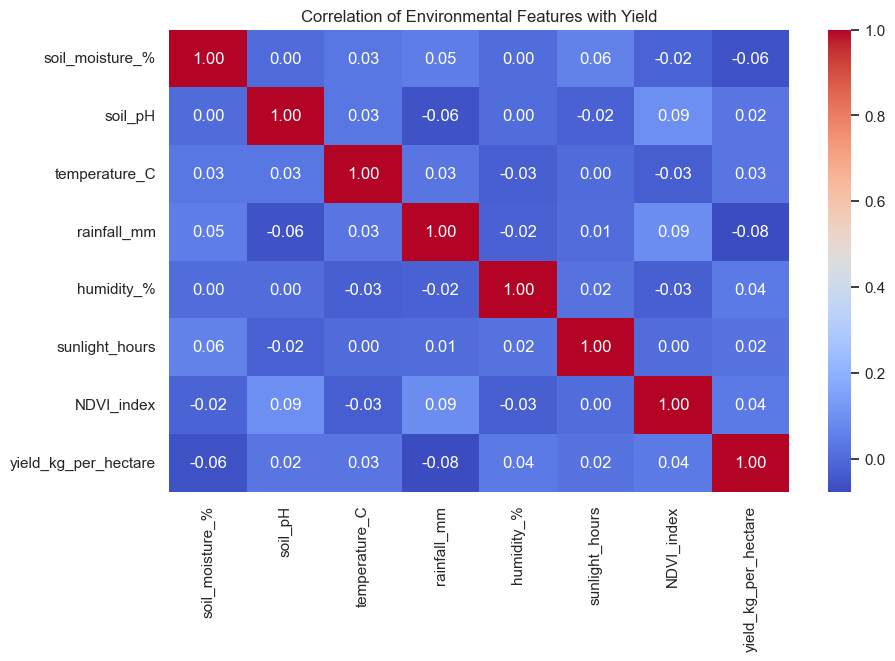

In [11]:
#show correlation of major columns
env_features = ['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
                'humidity_%', 'sunlight_hours', 'NDVI_index', 'yield_kg_per_hectare']
corr_matrix = df[env_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Environmental Features with Yield")
plt.show()

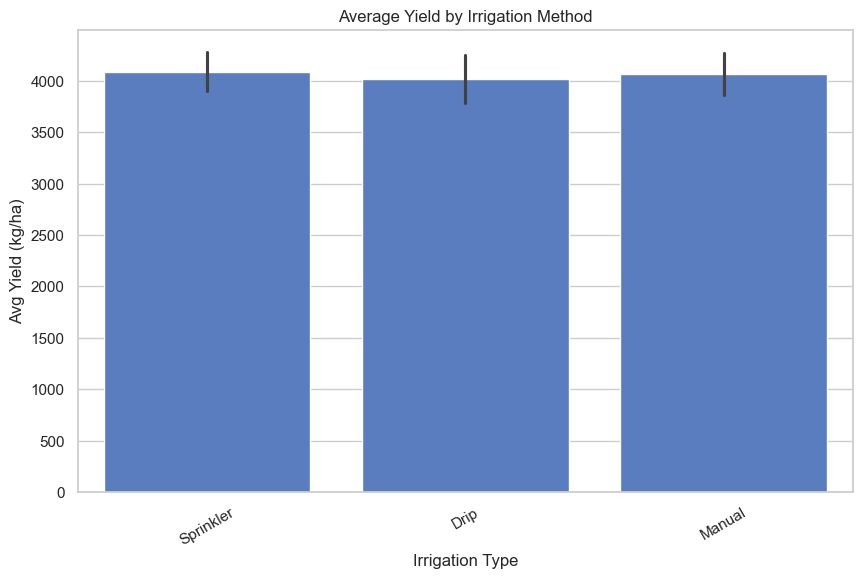

In [12]:
#show boxplot of Average Yield by Irrigation Method
sns.barplot(data=df, x='irrigation_type', y='yield_kg_per_hectare', estimator='mean')
plt.title("Average Yield by Irrigation Method")
plt.ylabel("Avg Yield (kg/ha)")
plt.xlabel("Irrigation Type")
plt.xticks(rotation=30)
plt.show()

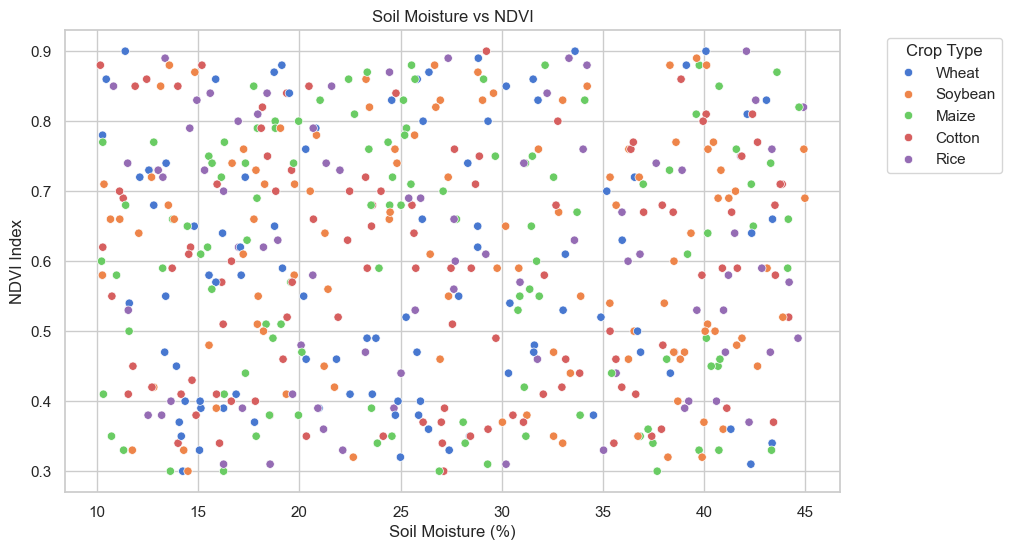

In [13]:
#show scatterplot of Soil Moisture vs NDVI
sns.scatterplot(data=df, x='soil_moisture_%', y='NDVI_index', hue='crop_type')
plt.title("Soil Moisture vs NDVI")
plt.xlabel("Soil Moisture (%)")
plt.ylabel("NDVI Index")
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

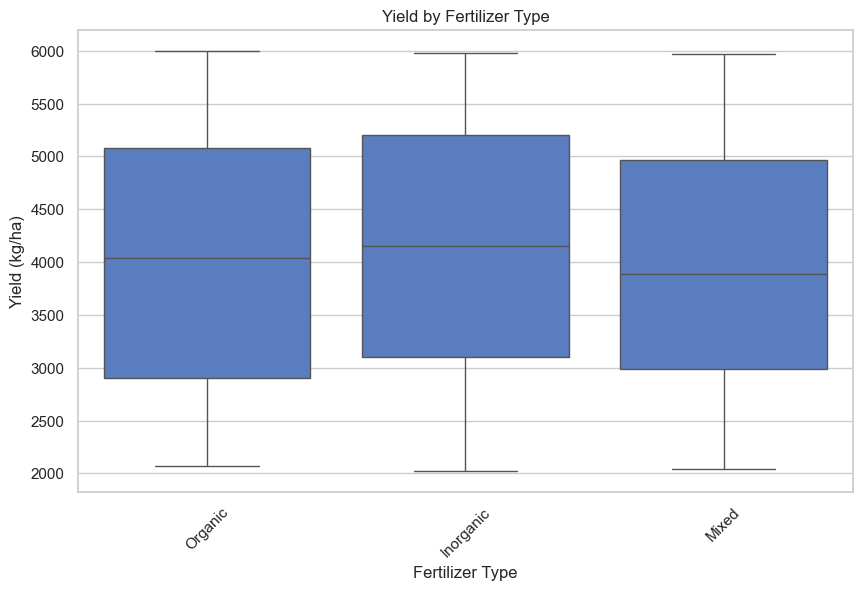

In [14]:
#show boxplot of Yield by Fertilizer Type
sns.boxplot(data=df, x='fertilizer_type', y='yield_kg_per_hectare')
plt.title("Yield by Fertilizer Type")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Fertilizer Type")
plt.xticks(rotation=45)
plt.show()

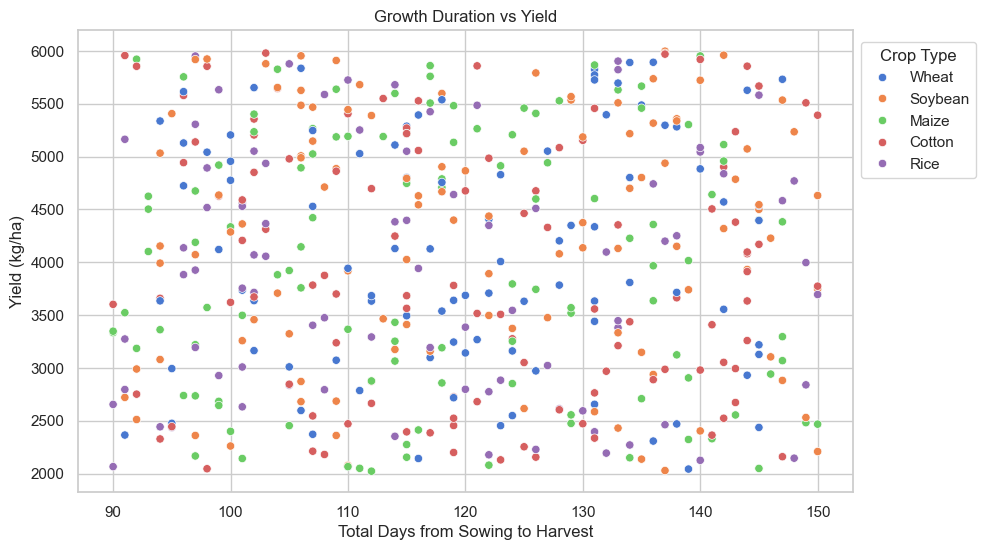

In [15]:
#show scatterplot of Growth Duration vs Yield
sns.scatterplot(data=df, x='total_days', y='yield_kg_per_hectare', hue='crop_type')
plt.title("Growth Duration vs Yield")
plt.xlabel("Total Days from Sowing to Harvest")
plt.ylabel("Yield (kg/ha)")
plt.legend(title="Crop Type", bbox_to_anchor=(1, 0.99), loc='upper left')
plt.show()

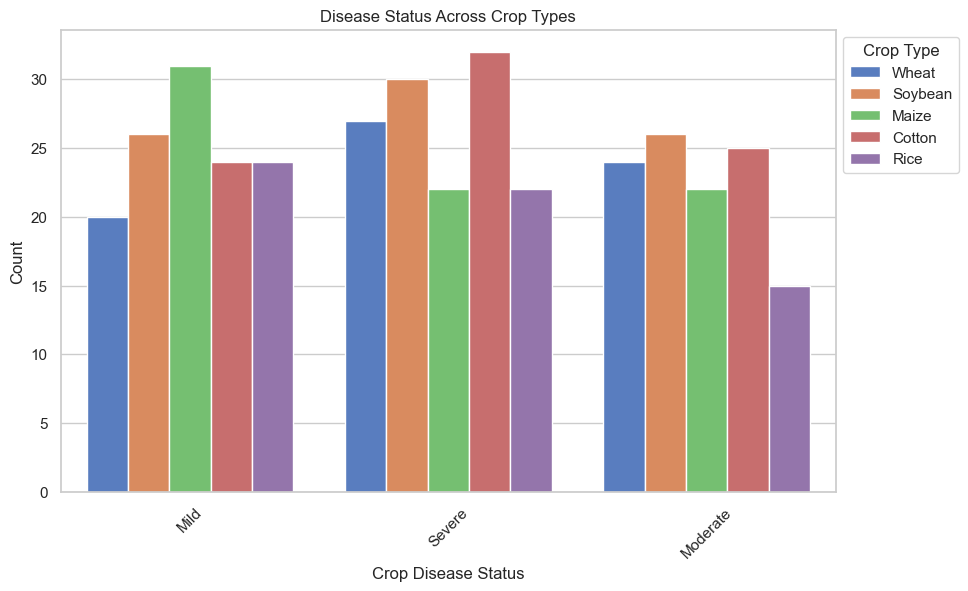

In [16]:
#show countplot of Disease Status Across Crop Types
sns.countplot(data=df, x='crop_disease_status', hue='crop_type')
plt.title("Disease Status Across Crop Types")
plt.xlabel("Crop Disease Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Crop Type",bbox_to_anchor=(1,1),loc='upper left')
plt.show()

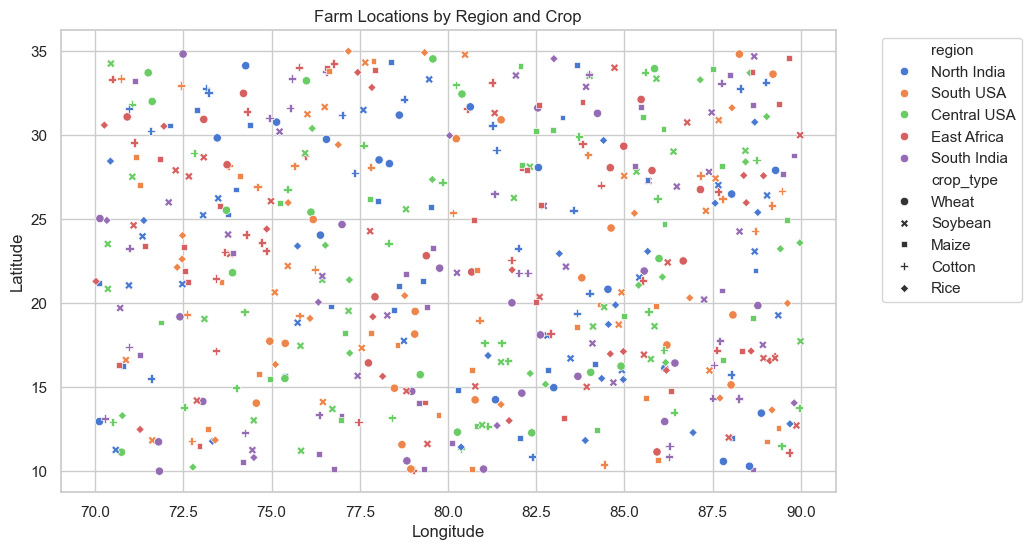

In [17]:
#show scatterplot of Farm Locations by Region and Crop
sns.scatterplot(data=df, x='longitude', y='latitude', hue='region', style='crop_type')
plt.title("Farm Locations by Region and Crop")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

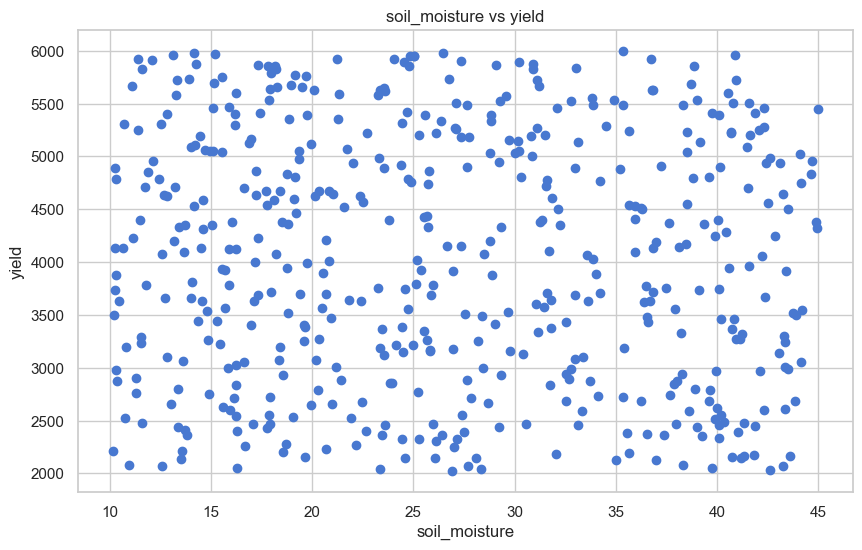

In [18]:
#show scatterplot of soil_moisture over yield
plt.scatter(x=df['soil_moisture_%'],y=df['yield_kg_per_hectare'])
plt.xlabel('soil_moisture')
plt.title('soil_moisture vs yield')
plt.ylabel("yield")
plt.show()

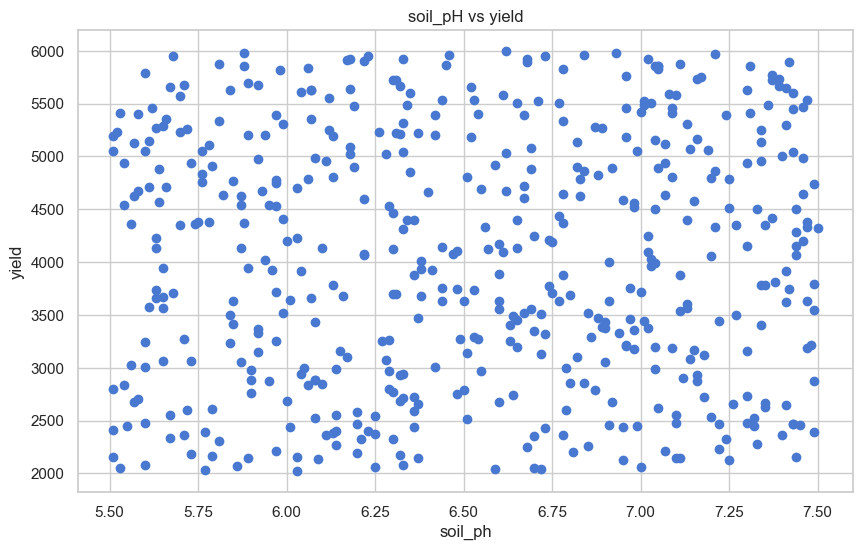

In [19]:
#show scatterplot of soil_pH over yield
plt.scatter(x=df['soil_pH'],y=df['yield_kg_per_hectare'])
plt.xlabel('soil_ph')
plt.title('soil_pH vs yield')
plt.ylabel("yield")
plt.show()

<Axes: xlabel='temperature_C', ylabel='yield_kg_per_hectare'>

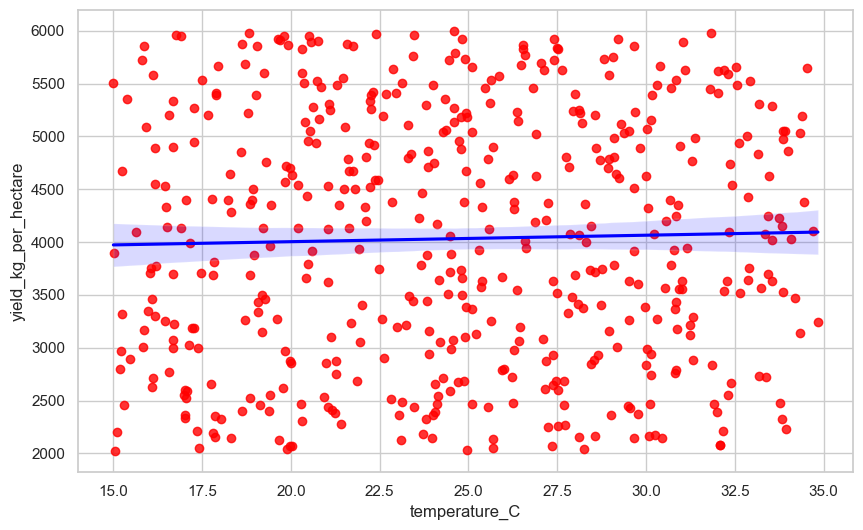

In [20]:
#show regplot of temperature over yield_kg_per_hectare
sns.regplot(x='temperature_C',y='yield_kg_per_hectare',data=df,scatter_kws={'color':'red'},line_kws={'color':"blue"})

In [24]:
#Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Prepare data for ML
# Select numeric features (drop non-numeric like crop_type, region for now)
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['yield_kg_per_hectare'])
y = df['yield_kg_per_hectare']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape, "Testing data:", X_test.shape)

Training data: (400, 11) Testing data: (100, 11)


In [26]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("📌 Linear Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


📌 Linear Regression Performance:
R2 Score: -0.0515842253713632
RMSE: 1205.1193874404933


In [27]:
# Train Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("📌 Random Forest Performance:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


📌 Random Forest Performance:
R2 Score: -0.09204631356790305
RMSE: 1228.0854060719882


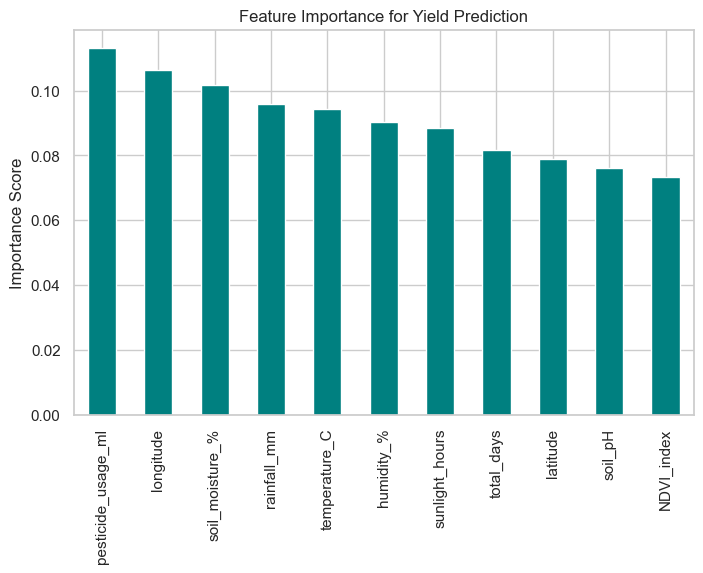

In [28]:
# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot(kind="bar", color="teal")
plt.title("Feature Importance for Yield Prediction")
plt.ylabel("Importance Score")
plt.show()
